# Casual Goodhart

Causal Goodhart happens when you observe a correlation between the proxy and the goal, but when you intervene to increase the proxy, the causal link between the proxy and the goal change such that the proxy no longer tracks the goal.

## Three Causal Goodhart Effects

### Shared Cause

Shared Cause Intervention - When we intervene on a shared cause of the proxy and the goal.

#### Example

Suppose we have two tests we give to students, with scores on each test being correlated.

Text(0, 0.5, 'Test 2 Scores')

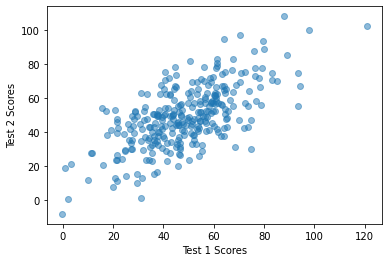

In [2]:
import numpy as np
import matplotlib.pyplot as plt

num_students = 300
knowledge = np.random.normal(loc=50, scale=15, size=num_students)
test1_scores = knowledge + np.random.normal(loc=0, scale=10, size=num_students)
test2_scores = knowledge + np.random.normal(loc=0, scale=10, size=num_students)

plt.scatter(x=test1_scores, y=test2_scores, alpha=0.5)
plt.xlabel('Test 1 Scores')
plt.ylabel('Test 2 Scores')

Let's see what happens when we intervene on a shared cause between both tests. Suppose we teach all the students everything that will be on the test.

In [3]:
knowledge = np.full(num_students, 100)
test1_scores = knowledge + np.random.normal(loc=0, scale=10, size=num_students)
test2_scores = knowledge + np.random.normal(loc=0, scale=10, size=num_students)

Now, let's see what the relationship looks like between the two tests.

Text(0, 0.5, 'Test 2 Scores')

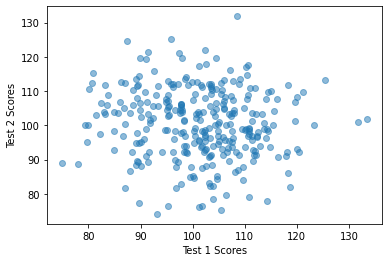

In [4]:
plt.scatter(x=test1_scores, y=test2_scores, alpha=0.5)
plt.xlabel('Test 1 Scores')
plt.ylabel('Test 2 Scores')

The correlation between the two tests as completely disappeared! 

### Intermediary 
Intermediary Intervention - When we intervene on a variable in the causal chain connecting our goal and our proxy.

#### Example
In this example, there's a causal chain from our goal to some metric, X, to our proxy. Our goal affects some metrix, X, which in turn affects our proxy, so the proxy and the goal are connected, in a way.

Text(0, 0.5, 'Proxy')

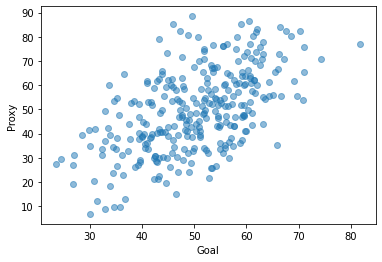

In [5]:
num_points = 300
goal = np.random.normal(loc=50, scale=10, size=num_points)
X = goal + np.random.normal(loc=0, scale=10, size=num_points)
proxy = X + np.random.normal(loc=0, scale=10, size=num_points)
plt.scatter(x=goal, y=proxy, alpha=0.5)
plt.xlabel('Goal')
plt.ylabel('Proxy')

Since X affects our proxy, we might decide to change the proxy by fixing X. Suppose we set X to a high value, like 100.

Text(0, 0.5, 'Proxy')

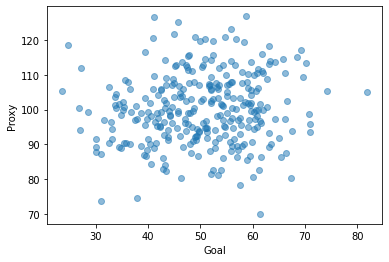

In [9]:
fixed_X = np.full(num_points, 100)
new_proxy = fixed_X + np.random.normal(loc=0, scale=10, size=num_points)

plt.scatter(x=goal, y=new_proxy, alpha=0.5)
plt.xlabel('Goal')
plt.ylabel('Proxy')

The relationship between the goal and proxy now no longer exists; they are independent variables. This does not necessarily affect the goal at all (notice how it's still clustered around 50), but can serve to increase the value of the proxy (which is now clustered around 100).

### Proxy Manipulation
Proxy Manipulation - When we intervene to set the proxy, without affecting anything else.

#### Example
Typically, we use tests to gauge how much learning has taken place. In most cases, test scores are reasonably correlated with learning (although, test scores aren't an exact measure, remember Regressional Goodhart!). We can plot this.

Text(0, 0.5, 'Learning')

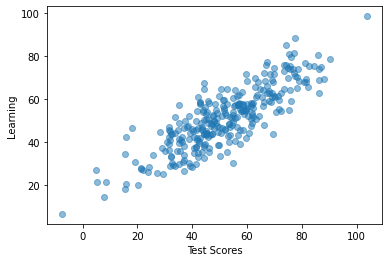

In [10]:
num_students = 300
learning = np.random.normal(loc=50, scale=15, size=num_students)
noise = np.random.normal(loc=0, scale=10, size=num_students)
test_scores = learning + noise
plt.scatter(x=test_scores, y=learning, alpha=0.5)
plt.xlabel('Test Scores')
plt.ylabel('Learning')

But consider a teacher that wants to make it appear as if their students have learned more than they actually have. They might give all their students perfect scores.

Text(0, 0.5, 'Learning')

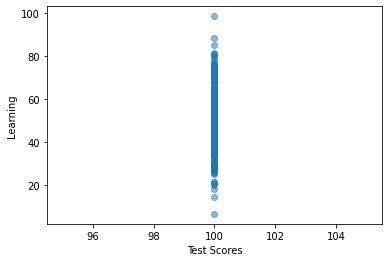

In [11]:
test_scores = np.full(num_students, 100)
plt.scatter(x=test_scores, y=learning, alpha=0.5)
plt.xlabel('Test Scores')
plt.ylabel('Learning')

Test scores are no longer correlated with how much learning has taken place.